# **_DESARROLLO LABORATORIO 19_**

In [2]:
#Just in Case
import warnings
warnings.filterwarnings('ignore')


#Importando las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import model_evaluation_utils as meu

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix, auc, roc_curve
from sklearn.preprocessing import label_binarize
from mlxtend.plotting import plot_decision_regions
from sklearn.naive_bayes import GaussianNB       #Para hacer un modelo Naive-Bayes
from sklearn.svm import SVC                      #Para hacer un modelo de Máquina de Soporte Vectorial



In [3]:
# Estableciendo mi directorio de trabajo
os.chdir('D:\Social Data Consulting\Python for Data Science\data')

In [4]:
miArchivo="diabetes.csv"
df_diabetes=pd.read_csv(miArchivo)
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


### **_1.Representar la variable predictora mediante el grafico de barras_**

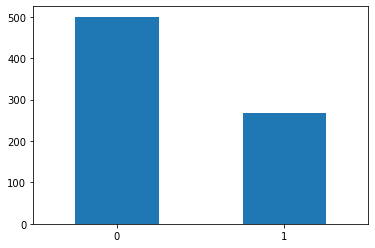

In [5]:
pd.value_counts(df_diabetes.Outcome).plot(kind='bar',rot=0)

### **_2.Dividir la data en 60% de entrenamiento y lo restante para la data de testeo_**

In [53]:
columnas=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target=['Outcome']

In [54]:
X=df_diabetes.iloc[:,0:df_diabetes.shape[1]-1].values
y=df_diabetes.iloc[:,df_diabetes.shape[1]-1].values

In [55]:
xtrain,xtest,ytrain,ytest=train_test_split(X,
                                           y,
                                           test_size=0.4,
                                           random_state=2020,
                                           stratify=y)

In [56]:
xtrain_df=pd.DataFrame(xtrain,columns=columnas)
ytrain_df=pd.DataFrame(ytrain,columns=target)

xtest_df=pd.DataFrame(xtest,columns=columnas)
ytest_df=pd.DataFrame(ytest,columns=target)

df_diabetes_train=pd.concat([xtrain_df,ytrain_df],axis=1)
df_diabetes_test=pd.concat([xtest_df,ytest_df],axis=1)

### **_3. Entrenar el modelo y sacar el score de la data de entrenamiento y testeo_**

#### **_Discretizacion_**

In [57]:
#Instanciamos un objeto de clase KBinsDiscretizer
kbd=KBinsDiscretizer(n_bins=3,encode='ordinal',strategy='kmeans')

In [58]:
train_discreta=kbd.fit_transform(df_diabetes_train.loc[:,columnas])
test_discreta=kbd.transform(df_diabetes_test.loc[:,columnas])

In [59]:
train_discreta_df=pd.DataFrame(train_discreta,columns=columnas)
test_discreta_df=pd.DataFrame(test_discreta,columns=columnas)

In [60]:
df_diabetes_train.Pregnancies=train_discreta_df.Pregnancies
df_diabetes_train.Glucose=train_discreta_df.Glucose
df_diabetes_train.BloodPressure=train_discreta_df.BloodPressure
df_diabetes_train.SkinThickness=train_discreta_df.SkinThickness
df_diabetes_train.Insulin=train_discreta_df.Insulin
df_diabetes_train.BMI=train_discreta_df.BMI
df_diabetes_train.DiabetesPedigreeFunction=train_discreta_df.DiabetesPedigreeFunction
df_diabetes_train.Age=train_discreta_df.Age

In [61]:
df_diabetes_test.Pregnancies=test_discreta_df.Pregnancies
df_diabetes_test.Glucose=test_discreta_df.Glucose
df_diabetes_test.BloodPressure=test_discreta_df.BloodPressure
df_diabetes_test.SkinThickness=test_discreta_df.SkinThickness
df_diabetes_test.Insulin=test_discreta_df.Insulin
df_diabetes_test.BMI=test_discreta_df.BMI
df_diabetes_test.DiabetesPedigreeFunction=test_discreta_df.DiabetesPedigreeFunction
df_diabetes_test.Age=test_discreta_df.Age

In [84]:
df_diabetes_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,2.0,2.0,1.0,0.0,1.0,0.0,1.0,0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
2,0.0,2.0,2.0,0.0,0.0,2.0,2.0,1.0,0
3,0.0,0.0,1.0,1.0,0.0,1.0,2.0,0.0,0
4,2.0,1.0,2.0,1.0,1.0,1.0,0.0,1.0,0


In [85]:
df_diabetes_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.0,2.0,2.0,1.0,1.0,1.0,1.0,0.0,1
1,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1
2,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1
3,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0


#### **_Instanciamos y entrenamos el modelo_**

In [62]:
clf=GaussianNB()

In [63]:
clf.fit(xtrain,ytrain)

GaussianNB()

#### **_Obtenemos el score del modelo Naive Bayes_**

#### **_Score para datos de entrenamiento_**

In [64]:
clf.score(xtrain,ytrain)

0.7608695652173914

#### **_Score para datos de testeo_**

In [69]:
clf.score(xtest,ytest)

0.7532467532467533

### **_4. Generar la matriz de confusion_**

#### **_Matriz de confusión para data de entrenamiento_**

In [79]:
#Estableciendo etiquetas
label_names=[0,1]

In [75]:
#Calculandremos los Ypredichos
ypredichos_train=clf.predict(xtrain)

In [76]:
confusion_matrix(ytrain,ypredichos_train)

array([[251,  48],
       [ 62,  99]], dtype=int64)

In [80]:
#Evaluando la performance del modelo para datos de entrenamiento
meu.display_model_performance_metrics(true_labels=ytrain,predicted_labels=ypredichos_train, classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7609
Precision: 0.757
Recall: 0.7609
F1 Score: 0.7582

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       299
           1       0.67      0.61      0.64       161

    accuracy                           0.76       460
   macro avg       0.74      0.73      0.73       460
weighted avg       0.76      0.76      0.76       460


Prediction Confusion Matrix:
------------------------------
     0   1
0  251  48
1   62  99


#### **_Matriz de confusión para data de testeo_**

In [77]:
ypredichos_test=clf.predict(xtest)

In [78]:
confusion_matrix(ytest,ypredichos_test)

array([[163,  38],
       [ 38,  69]], dtype=int64)

In [81]:
#Evaluando la performance del modelo para datos de entrenamiento
meu.display_model_performance_metrics(true_labels=ytest,predicted_labels=ypredichos_test, classes=label_names)

Model Performance metrics:
------------------------------
Accuracy: 0.7532
Precision: 0.7532
Recall: 0.7532
F1 Score: 0.7532

Model Classification report:
------------------------------
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       201
           1       0.64      0.64      0.64       107

    accuracy                           0.75       308
   macro avg       0.73      0.73      0.73       308
weighted avg       0.75      0.75      0.75       308


Prediction Confusion Matrix:
------------------------------
     0   1
0  163  38
1   38  69


### **_5. Generar la curva ROC_**

#### **_Curva ROC para data de entrenamiento_**

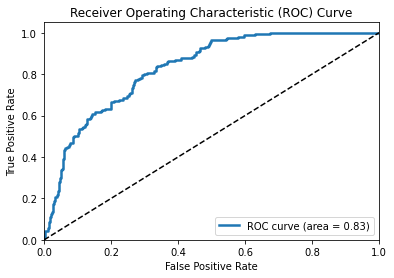

In [82]:
meu.plot_model_roc_curve(clf,xtrain,ytrain)

#### **_Curva ROC para data de testeo_**

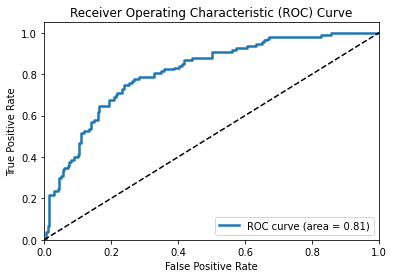

In [83]:
meu.plot_model_roc_curve(clf,xtest,ytest)